In [1]:
#-------------Imports--------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

In [2]:
#-----------Load Dataset-----------

path_train = "fashion_train.npy"
path_test = "fashion_test.npy"

train = np.load(path_train)
test = np.load(path_test)

#Split the training and test data into features and labels
X = train[:,:784]
y = train[:,784]

X = X / 255

X_test = test[:,:784]
y_test = test[:,784]

X_test = X_test / 255

print(X.shape)
print(y.shape)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(5000, 784)
(5000,)


### Split training set into training and validation set

In [3]:
train_percentage = int((X.shape[0]) * 0.7)
train_percentage

X_train = X[:train_percentage, :]
y_train = y[:train_percentage]

print(X_train.shape)
print(y_train.shape)

X_val = X[train_percentage:, :]
y_val = y[train_percentage:]

print(X_val.shape)
print(y_val.shape)

(7000, 784)
(7000,)
(3000, 784)
(3000,)


### Final chosen model

In [31]:
model = Sequential([
    Dense(units=100, activation="relu"),
    Dropout(0.2),
    Dense(units=50, activation="relu"),
    Dropout(0.2),
    Dense(units=25, activation="relu"),
    Dropout(0.2),
    Dense(units=5, activation="linear")
])

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer=Adam(learning_rate=(1e-5)*3),
              metrics=["accuracy"]
             )

In [32]:
callbacks = [EarlyStopping(patience=3, monitor="val_loss", restore_best_weights=True)]

In [33]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 1.4839 - accuracy: 0.3570 - val_loss: 1.2433 - val_accuracy: 0.6893
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 1.2108 - accuracy: 0.5440 - val_loss: 0.9735 - val_accuracy: 0.7093
Epoch 3/100
219/219 [==============================] - 0s 2ms/step - loss: 1.0607 - accuracy: 0.6047 - val_loss: 0.8452 - val_accuracy: 0.7263
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 0.9566 - accuracy: 0.6431 - val_loss: 0.7645 - val_accuracy: 0.7320
Epoch 5/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8923 - accuracy: 0.6703 - val_loss: 0.7178 - val_accuracy: 0.7423
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8458 - accuracy: 0.6826 - val_loss: 0.6822 - val_accuracy: 0.7473
Epoch 7/100
219/219 [==============================] - 0s 2ms/step - loss: 0.8032 - accuracy: 0.6994 - val_loss: 0.6532 - val_accuracy: 0.7650

In [34]:
metrics_df = pd.DataFrame(history.history)

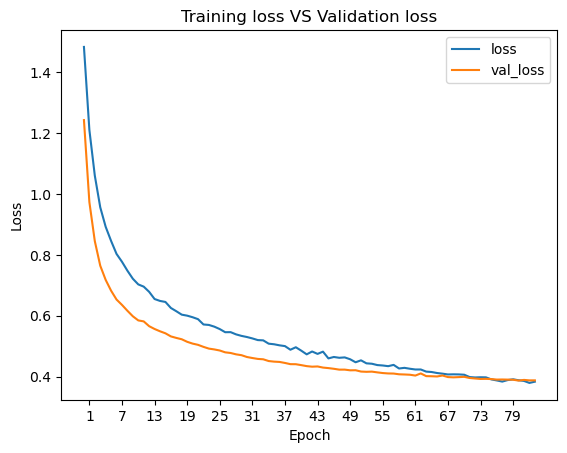

In [36]:
metrics_df[["loss","val_loss"]].plot()
plt.xticks(list(range(1,85,6)))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training loss VS Validation loss");

### Make predictions and test accuracy on training set

In [37]:
logits_train2 = model(X_train)
probs_train2 = tf.nn.softmax(logits_train2)
probs_train2 = tf.make_tensor_proto(probs_train2)
probs_np2 = tf.make_ndarray(probs_train2)
y_pred2 = np.argmax(probs_np2, axis=1)
accuracy_score(y_pred2, y_train)

0.8864285714285715

### Make predictions and test accuracy on validation set

In [38]:
logits_val2 = model(X_val)
probs_val2 = tf.nn.softmax(logits_val2)
probs_val2 = tf.make_tensor_proto(probs_val2)
probs_np_val2 = tf.make_ndarray(probs_val2)
y_pred_val2 = np.argmax(probs_np_val2, axis=1)
accuracy_score(y_pred_val2, y_val)

0.8523333333333334

### Final test on the test set

In [39]:
logits_test2 = model(X_test)
probs_test2 = tf.nn.softmax(logits_test2)
probs_test2 = tf.make_tensor_proto(probs_test2)
probs_np_test2 = tf.make_ndarray(probs_test2)
y_pred_test2 = np.argmax(probs_np_test2, axis=1)
accuracy_score(y_pred_test2, y_test)

0.8418